In [1]:
import sys
sys.path.append("F:/skripsi/FAS-Skripsi-4")

from tqdm.notebook import tqdm
import torch
from torchvision.transforms import ToTensor, Normalize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from PIL import Image
import cv2
from face_detection import FaceDetection, FaceSelectionMethod
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances
from fas_simple_distill.model.resnet_ssdg.ssdg_resnet_baseline_noise_generator import DG_model_noise

sys.path.remove("F:/skripsi/FAS-Skripsi-4")

In [2]:
root_path = "F:/skripsi/FAS-Skripsi-4/seaborn_data/casia_mfsd"
ckpt_path = "F:/skripsi/FAS-Skripsi-4/evaluator/weights/ssdg_noise_generator_feat_mining_OMItoC.pth"
max_subject = 20
distance_type = "cosine" # 'euclidean' or 'cosine'
device = "cuda" # 'cpu' or 'cuda'

ckpt = torch.load(ckpt_path)
model_ckpt = ckpt["model"]

model = DG_model_noise(
    model="resnet18",
    embedding_size=512,
    drop_rate=0.0,
    norm_flag=True,
)

model.load_state_dict(model_ckpt)
model.to(device)
model.eval()
model.requires_grad_(False)

RuntimeError: Error(s) in loading state_dict for DG_model_noise:
	Missing key(s) in state_dict: "model.embedder.backbone.conv1.weight", "model.embedder.backbone.bn1.weight", "model.embedder.backbone.bn1.bias", "model.embedder.backbone.bn1.running_mean", "model.embedder.backbone.bn1.running_var", "model.embedder.backbone.layer1.0.conv1.weight", "model.embedder.backbone.layer1.0.bn1.weight", "model.embedder.backbone.layer1.0.bn1.bias", "model.embedder.backbone.layer1.0.bn1.running_mean", "model.embedder.backbone.layer1.0.bn1.running_var", "model.embedder.backbone.layer1.0.conv2.weight", "model.embedder.backbone.layer1.0.bn2.weight", "model.embedder.backbone.layer1.0.bn2.bias", "model.embedder.backbone.layer1.0.bn2.running_mean", "model.embedder.backbone.layer1.0.bn2.running_var", "model.embedder.backbone.layer1.1.conv1.weight", "model.embedder.backbone.layer1.1.bn1.weight", "model.embedder.backbone.layer1.1.bn1.bias", "model.embedder.backbone.layer1.1.bn1.running_mean", "model.embedder.backbone.layer1.1.bn1.running_var", "model.embedder.backbone.layer1.1.conv2.weight", "model.embedder.backbone.layer1.1.bn2.weight", "model.embedder.backbone.layer1.1.bn2.bias", "model.embedder.backbone.layer1.1.bn2.running_mean", "model.embedder.backbone.layer1.1.bn2.running_var", "model.embedder.backbone.layer2.0.conv1.weight", "model.embedder.backbone.layer2.0.bn1.weight", "model.embedder.backbone.layer2.0.bn1.bias", "model.embedder.backbone.layer2.0.bn1.running_mean", "model.embedder.backbone.layer2.0.bn1.running_var", "model.embedder.backbone.layer2.0.conv2.weight", "model.embedder.backbone.layer2.0.bn2.weight", "model.embedder.backbone.layer2.0.bn2.bias", "model.embedder.backbone.layer2.0.bn2.running_mean", "model.embedder.backbone.layer2.0.bn2.running_var", "model.embedder.backbone.layer2.0.downsample.0.weight", "model.embedder.backbone.layer2.0.downsample.1.weight", "model.embedder.backbone.layer2.0.downsample.1.bias", "model.embedder.backbone.layer2.0.downsample.1.running_mean", "model.embedder.backbone.layer2.0.downsample.1.running_var", "model.embedder.backbone.layer2.1.conv1.weight", "model.embedder.backbone.layer2.1.bn1.weight", "model.embedder.backbone.layer2.1.bn1.bias", "model.embedder.backbone.layer2.1.bn1.running_mean", "model.embedder.backbone.layer2.1.bn1.running_var", "model.embedder.backbone.layer2.1.conv2.weight", "model.embedder.backbone.layer2.1.bn2.weight", "model.embedder.backbone.layer2.1.bn2.bias", "model.embedder.backbone.layer2.1.bn2.running_mean", "model.embedder.backbone.layer2.1.bn2.running_var", "model.embedder.backbone.layer3.0.conv1.weight", "model.embedder.backbone.layer3.0.bn1.weight", "model.embedder.backbone.layer3.0.bn1.bias", "model.embedder.backbone.layer3.0.bn1.running_mean", "model.embedder.backbone.layer3.0.bn1.running_var", "model.embedder.backbone.layer3.0.conv2.weight", "model.embedder.backbone.layer3.0.bn2.weight", "model.embedder.backbone.layer3.0.bn2.bias", "model.embedder.backbone.layer3.0.bn2.running_mean", "model.embedder.backbone.layer3.0.bn2.running_var", "model.embedder.backbone.layer3.0.downsample.0.weight", "model.embedder.backbone.layer3.0.downsample.1.weight", "model.embedder.backbone.layer3.0.downsample.1.bias", "model.embedder.backbone.layer3.0.downsample.1.running_mean", "model.embedder.backbone.layer3.0.downsample.1.running_var", "model.embedder.backbone.layer3.1.conv1.weight", "model.embedder.backbone.layer3.1.bn1.weight", "model.embedder.backbone.layer3.1.bn1.bias", "model.embedder.backbone.layer3.1.bn1.running_mean", "model.embedder.backbone.layer3.1.bn1.running_var", "model.embedder.backbone.layer3.1.conv2.weight", "model.embedder.backbone.layer3.1.bn2.weight", "model.embedder.backbone.layer3.1.bn2.bias", "model.embedder.backbone.layer3.1.bn2.running_mean", "model.embedder.backbone.layer3.1.bn2.running_var", "model.embedder.backbone.layer4.0.conv1.weight", "model.embedder.backbone.layer4.0.bn1.weight", "model.embedder.backbone.layer4.0.bn1.bias", "model.embedder.backbone.layer4.0.bn1.running_mean", "model.embedder.backbone.layer4.0.bn1.running_var", "model.embedder.backbone.layer4.0.conv2.weight", "model.embedder.backbone.layer4.0.bn2.weight", "model.embedder.backbone.layer4.0.bn2.bias", "model.embedder.backbone.layer4.0.bn2.running_mean", "model.embedder.backbone.layer4.0.bn2.running_var", "model.embedder.backbone.layer4.0.downsample.0.weight", "model.embedder.backbone.layer4.0.downsample.1.weight", "model.embedder.backbone.layer4.0.downsample.1.bias", "model.embedder.backbone.layer4.0.downsample.1.running_mean", "model.embedder.backbone.layer4.0.downsample.1.running_var", "model.embedder.backbone.layer4.1.conv1.weight", "model.embedder.backbone.layer4.1.bn1.weight", "model.embedder.backbone.layer4.1.bn1.bias", "model.embedder.backbone.layer4.1.bn1.running_mean", "model.embedder.backbone.layer4.1.bn1.running_var", "model.embedder.backbone.layer4.1.conv2.weight", "model.embedder.backbone.layer4.1.bn2.weight", "model.embedder.backbone.layer4.1.bn2.bias", "model.embedder.backbone.layer4.1.bn2.running_mean", "model.embedder.backbone.layer4.1.bn2.running_var", "model.embedder.fc.weight", "model.embedder.fc.bias", "model.embedder.embedder.0.weight", "model.embedder.embedder.0.bias", "model.classifier.classifier_layer.weight", "model.classifier.classifier_layer.bias", "noise_model.noise_layer1.weight", "noise_model.noise_layer1.bias", "noise_model.noise_layer2.weight", "noise_model.noise_layer2.bias". 
	Unexpected key(s) in state_dict: "embedder.backbone.conv1.weight", "embedder.backbone.bn1.weight", "embedder.backbone.bn1.bias", "embedder.backbone.bn1.running_mean", "embedder.backbone.bn1.running_var", "embedder.backbone.bn1.num_batches_tracked", "embedder.backbone.layer1.0.conv1.weight", "embedder.backbone.layer1.0.bn1.weight", "embedder.backbone.layer1.0.bn1.bias", "embedder.backbone.layer1.0.bn1.running_mean", "embedder.backbone.layer1.0.bn1.running_var", "embedder.backbone.layer1.0.bn1.num_batches_tracked", "embedder.backbone.layer1.0.conv2.weight", "embedder.backbone.layer1.0.bn2.weight", "embedder.backbone.layer1.0.bn2.bias", "embedder.backbone.layer1.0.bn2.running_mean", "embedder.backbone.layer1.0.bn2.running_var", "embedder.backbone.layer1.0.bn2.num_batches_tracked", "embedder.backbone.layer1.1.conv1.weight", "embedder.backbone.layer1.1.bn1.weight", "embedder.backbone.layer1.1.bn1.bias", "embedder.backbone.layer1.1.bn1.running_mean", "embedder.backbone.layer1.1.bn1.running_var", "embedder.backbone.layer1.1.bn1.num_batches_tracked", "embedder.backbone.layer1.1.conv2.weight", "embedder.backbone.layer1.1.bn2.weight", "embedder.backbone.layer1.1.bn2.bias", "embedder.backbone.layer1.1.bn2.running_mean", "embedder.backbone.layer1.1.bn2.running_var", "embedder.backbone.layer1.1.bn2.num_batches_tracked", "embedder.backbone.layer2.0.conv1.weight", "embedder.backbone.layer2.0.bn1.weight", "embedder.backbone.layer2.0.bn1.bias", "embedder.backbone.layer2.0.bn1.running_mean", "embedder.backbone.layer2.0.bn1.running_var", "embedder.backbone.layer2.0.bn1.num_batches_tracked", "embedder.backbone.layer2.0.conv2.weight", "embedder.backbone.layer2.0.bn2.weight", "embedder.backbone.layer2.0.bn2.bias", "embedder.backbone.layer2.0.bn2.running_mean", "embedder.backbone.layer2.0.bn2.running_var", "embedder.backbone.layer2.0.bn2.num_batches_tracked", "embedder.backbone.layer2.0.downsample.0.weight", "embedder.backbone.layer2.0.downsample.1.weight", "embedder.backbone.layer2.0.downsample.1.bias", "embedder.backbone.layer2.0.downsample.1.running_mean", "embedder.backbone.layer2.0.downsample.1.running_var", "embedder.backbone.layer2.0.downsample.1.num_batches_tracked", "embedder.backbone.layer2.1.conv1.weight", "embedder.backbone.layer2.1.bn1.weight", "embedder.backbone.layer2.1.bn1.bias", "embedder.backbone.layer2.1.bn1.running_mean", "embedder.backbone.layer2.1.bn1.running_var", "embedder.backbone.layer2.1.bn1.num_batches_tracked", "embedder.backbone.layer2.1.conv2.weight", "embedder.backbone.layer2.1.bn2.weight", "embedder.backbone.layer2.1.bn2.bias", "embedder.backbone.layer2.1.bn2.running_mean", "embedder.backbone.layer2.1.bn2.running_var", "embedder.backbone.layer2.1.bn2.num_batches_tracked", "embedder.backbone.layer3.0.conv1.weight", "embedder.backbone.layer3.0.bn1.weight", "embedder.backbone.layer3.0.bn1.bias", "embedder.backbone.layer3.0.bn1.running_mean", "embedder.backbone.layer3.0.bn1.running_var", "embedder.backbone.layer3.0.bn1.num_batches_tracked", "embedder.backbone.layer3.0.conv2.weight", "embedder.backbone.layer3.0.bn2.weight", "embedder.backbone.layer3.0.bn2.bias", "embedder.backbone.layer3.0.bn2.running_mean", "embedder.backbone.layer3.0.bn2.running_var", "embedder.backbone.layer3.0.bn2.num_batches_tracked", "embedder.backbone.layer3.0.downsample.0.weight", "embedder.backbone.layer3.0.downsample.1.weight", "embedder.backbone.layer3.0.downsample.1.bias", "embedder.backbone.layer3.0.downsample.1.running_mean", "embedder.backbone.layer3.0.downsample.1.running_var", "embedder.backbone.layer3.0.downsample.1.num_batches_tracked", "embedder.backbone.layer3.1.conv1.weight", "embedder.backbone.layer3.1.bn1.weight", "embedder.backbone.layer3.1.bn1.bias", "embedder.backbone.layer3.1.bn1.running_mean", "embedder.backbone.layer3.1.bn1.running_var", "embedder.backbone.layer3.1.bn1.num_batches_tracked", "embedder.backbone.layer3.1.conv2.weight", "embedder.backbone.layer3.1.bn2.weight", "embedder.backbone.layer3.1.bn2.bias", "embedder.backbone.layer3.1.bn2.running_mean", "embedder.backbone.layer3.1.bn2.running_var", "embedder.backbone.layer3.1.bn2.num_batches_tracked", "embedder.backbone.layer4.0.conv1.weight", "embedder.backbone.layer4.0.bn1.weight", "embedder.backbone.layer4.0.bn1.bias", "embedder.backbone.layer4.0.bn1.running_mean", "embedder.backbone.layer4.0.bn1.running_var", "embedder.backbone.layer4.0.bn1.num_batches_tracked", "embedder.backbone.layer4.0.conv2.weight", "embedder.backbone.layer4.0.bn2.weight", "embedder.backbone.layer4.0.bn2.bias", "embedder.backbone.layer4.0.bn2.running_mean", "embedder.backbone.layer4.0.bn2.running_var", "embedder.backbone.layer4.0.bn2.num_batches_tracked", "embedder.backbone.layer4.0.downsample.0.weight", "embedder.backbone.layer4.0.downsample.1.weight", "embedder.backbone.layer4.0.downsample.1.bias", "embedder.backbone.layer4.0.downsample.1.running_mean", "embedder.backbone.layer4.0.downsample.1.running_var", "embedder.backbone.layer4.0.downsample.1.num_batches_tracked", "embedder.backbone.layer4.1.conv1.weight", "embedder.backbone.layer4.1.bn1.weight", "embedder.backbone.layer4.1.bn1.bias", "embedder.backbone.layer4.1.bn1.running_mean", "embedder.backbone.layer4.1.bn1.running_var", "embedder.backbone.layer4.1.bn1.num_batches_tracked", "embedder.backbone.layer4.1.conv2.weight", "embedder.backbone.layer4.1.bn2.weight", "embedder.backbone.layer4.1.bn2.bias", "embedder.backbone.layer4.1.bn2.running_mean", "embedder.backbone.layer4.1.bn2.running_var", "embedder.backbone.layer4.1.bn2.num_batches_tracked", "embedder.fc.weight", "embedder.fc.bias", "embedder.embedder.0.weight", "embedder.embedder.0.bias", "classifier.classifier_layer.weight", "classifier.classifier_layer.bias". 

In [ ]:
class crop_align_face:
    def __init__(
        self,
        use_cuda: bool = True,
        no_rotate: bool = True,
        crop_size: int = 256,
        scale: float = 0.75,
        select_method = FaceSelectionMethod.AREA,
    ) -> None:
        use_onnx = not use_cuda
        self.fd = FaceDetection(use_cuda, no_rotate, use_onnx)
        self.crop_size = crop_size
        self.scale = scale
        self.select_method = select_method

    def __call__(self, x):
        if isinstance(x, Image.Image):
            input_is_pil = True
            x = np.array(x)
            x = cv2.cvtColor(x, cv2.COLOR_RGB2BGR)
        else:
            input_is_pil = False
        
        dets, angle = self.fd.predict(x)
        x_crop, _ = self.fd.align_single_face(x, dets, angle, self.crop_size, self.scale, self.select_method)

        if input_is_pil:
            x_crop = cv2.cvtColor(x_crop, cv2.COLOR_BGR2RGB)
            x_crop = Image.fromarray(x_crop)
        
        return x_crop

_crop_face = crop_align_face()
_to_tensor = ToTensor()
_normalize = Normalize(
    # mean=[0.485, 0.456, 0.406],
    # std=[0.229, 0.224, 0.225],
    mean=[0.5, 0.5, 0.5],
    std=[0.5, 0.5, 0.5],
)

def preprocess_data(image: np.ndarray) -> np.ndarray:
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    processed_data = Image.fromarray(rgb_image)
    processed_data = _crop_face(processed_data)
    processed_data = _to_tensor(processed_data)
    processed_data = _normalize(processed_data)
    return processed_data.unsqueeze(0).to(device)

In [ ]:
img_paths = list(Path(root_path).rglob("*.png")) + list(Path(root_path).rglob("*.jpg")) + list(Path(root_path).rglob("*.jpeg"))
live_img_paths = []
live_subjects = []
spoof_img_paths = []
spoof_subjects = []

for img_path in img_paths:
    if not "live" in str(img_path) and not "real" in str(img_path):
        continue
    live_img_paths.append(img_path)
    live_subjects.append(str(img_path.stem).split("_")[0])

for img_path in img_paths:
    if "live" in str(img_path) or "real" in str(img_path):
        continue
    spoof_img_paths.append(img_path)
    spoof_subjects.append(str(img_path.stem).split("_")[0])

live_subjects = np.asarray(live_subjects)
spoof_subjects = np.asarray(spoof_subjects)

live_num_subjects = np.unique(live_subjects, return_counts=True)[1]
spoof_num_subjects = np.unique(spoof_subjects, return_counts=True)[1]

del img_paths, live_subjects, spoof_subjects

# Live Class

In [ ]:
dist_data = np.zeros((max_subject, max_subject))
visited_subject = []

for img_path_1 in tqdm(live_img_paths):
    # subject_1 = str(img_path_1.stem).split("_")[0]
    subject_1 = str(img_path_1).split("\\")[5]
    if subject_1 in visited_subject:
        continue
    
    img_1 = cv2.imread(str(img_path_1))
    data_1 = preprocess_data(img_1)
    feat_1 = model(data_1)[1].cpu().detach().numpy()

    for img_path_2 in live_img_paths:
        if img_path_1 == img_path_2:
            continue

        # subject_2 = str(img_path_2.stem).split("_")[0]
        subject_2 = str(img_path_2).split("\\")[5]

        img_2 = cv2.imread(str(img_path_2))
        data_2 = preprocess_data(img_2)
        feat_2 = model(data_2)[1].cpu().detach().numpy()

        if distance_type == "euclidean":
            dist = euclidean_distances(feat_1, feat_2)
        else:
            dist = cosine_distances(feat_1, feat_2)

        dist_data[int(subject_1) - 1][int(subject_2) - 1] += dist[0][0]
    
    visited_subject.append(subject_1)

for i in range(max_subject):
    for j in range(max_subject):
        dist_data[i][j] /= live_num_subjects[j]

  0%|          | 0/120 [00:00<?, ?it/s]

<AxesSubplot: >

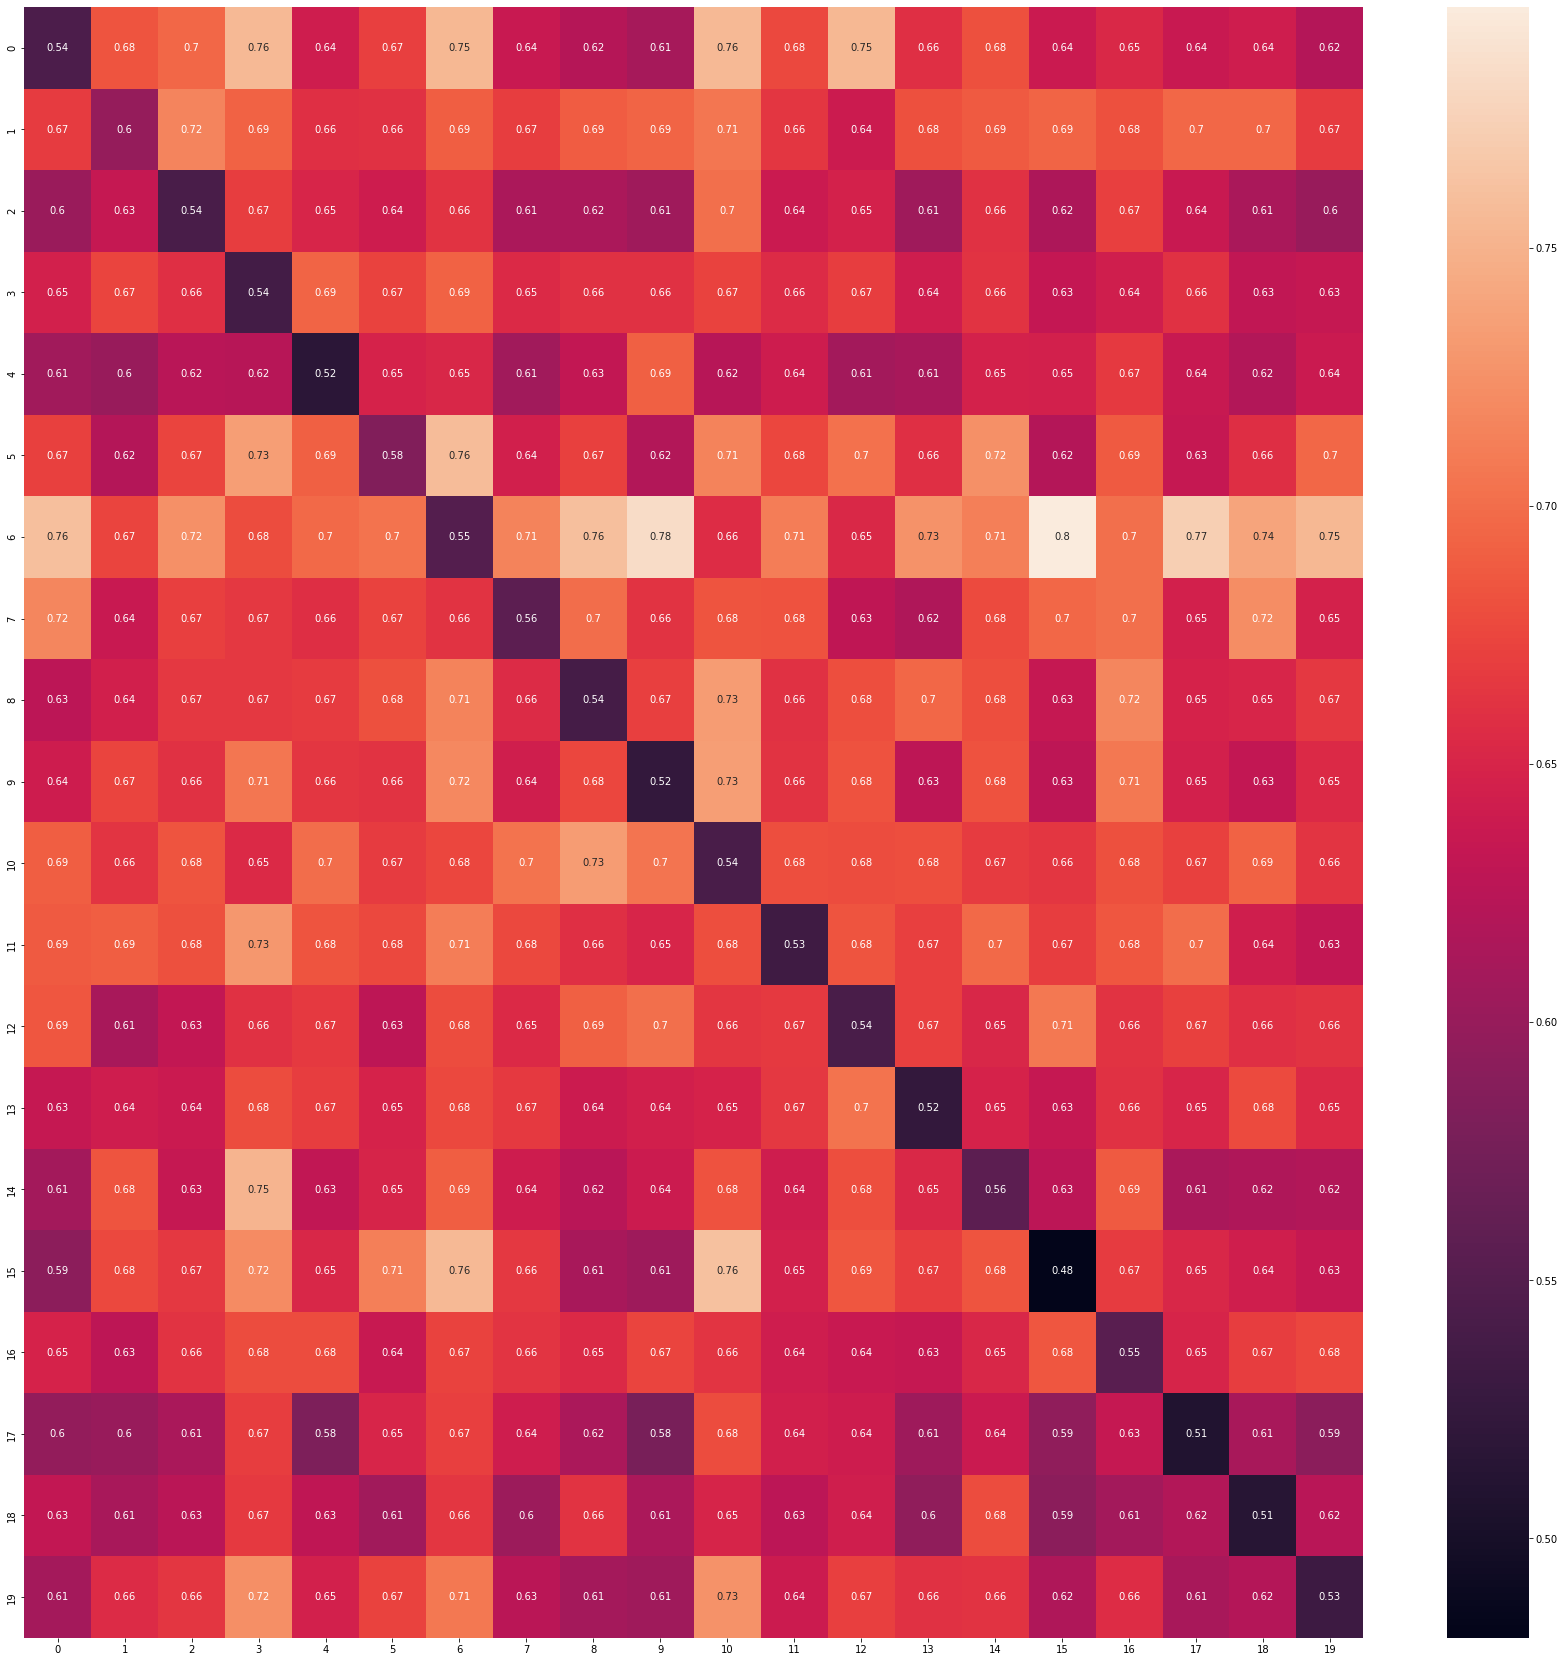

In [ ]:
ax = plt.figure("Seaborn Heatmap", (30, 30))
sns.heatmap(dist_data, annot=True, cbar=True)